### Name: Soham Vaidya
### UID: 2018130058
### Roll No. 63
### BE COMPS
### B Batch

# EXPERIMENT 3
## Time Series Forecasting: Data, Analysis, and Practice
### Importing the necessary libraries

In [1]:
import plotly.io as pio
pio.renderers.default = "colab"
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arma.model import ARMA

import math
from sklearn.metrics import mean_squared_error

In [2]:
stockData = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
stockData.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


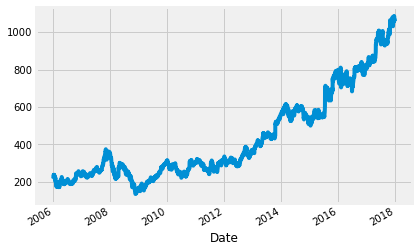

In [3]:
stockData['High'].plot()

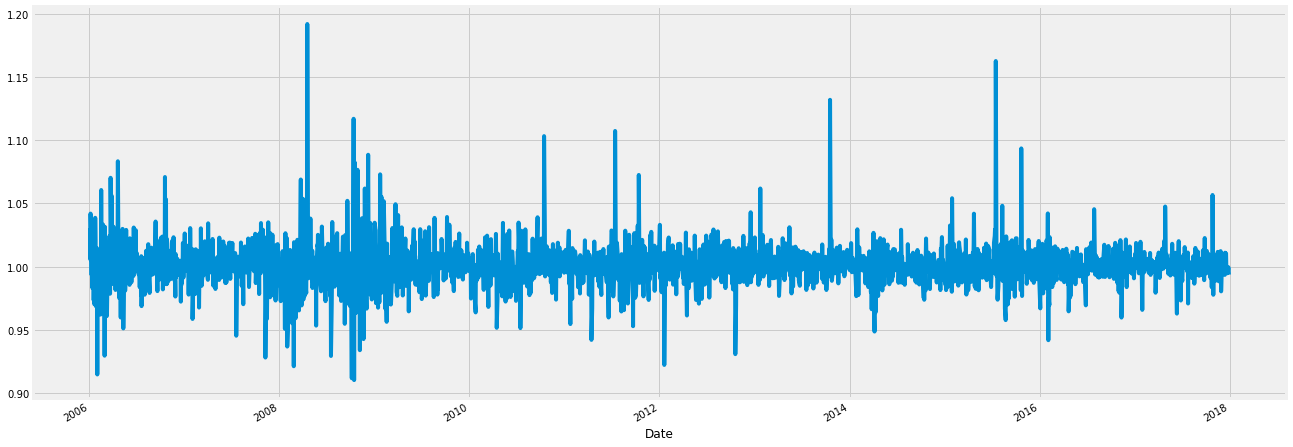

In [4]:
stockData['Change'] = stockData.High.div(stockData.High.shift())
stockData['Change'].plot(figsize=(20,8))

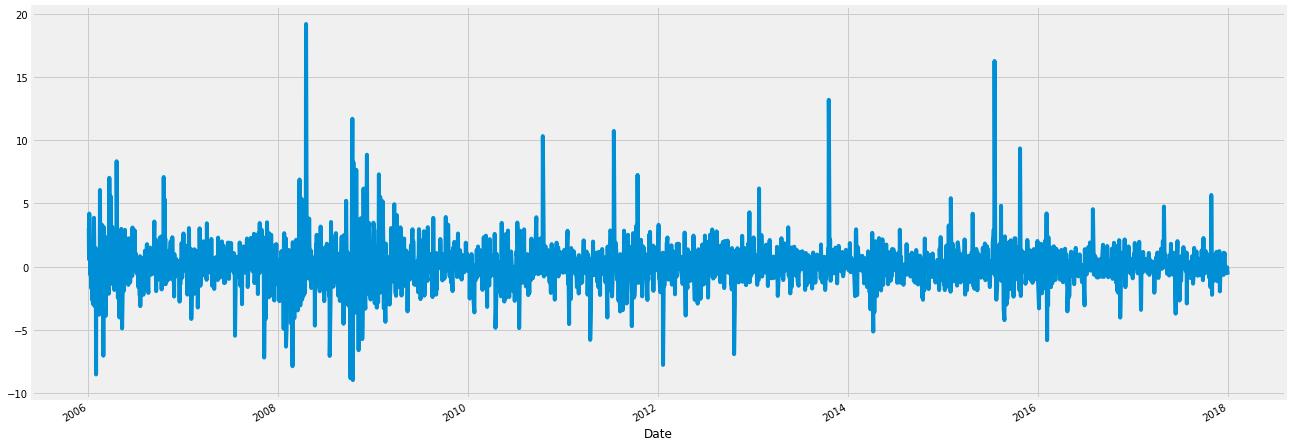

In [5]:
stockData['Return'] = stockData.Change.sub(1).mul(100)
stockData['Return'].plot(figsize=(20,8))

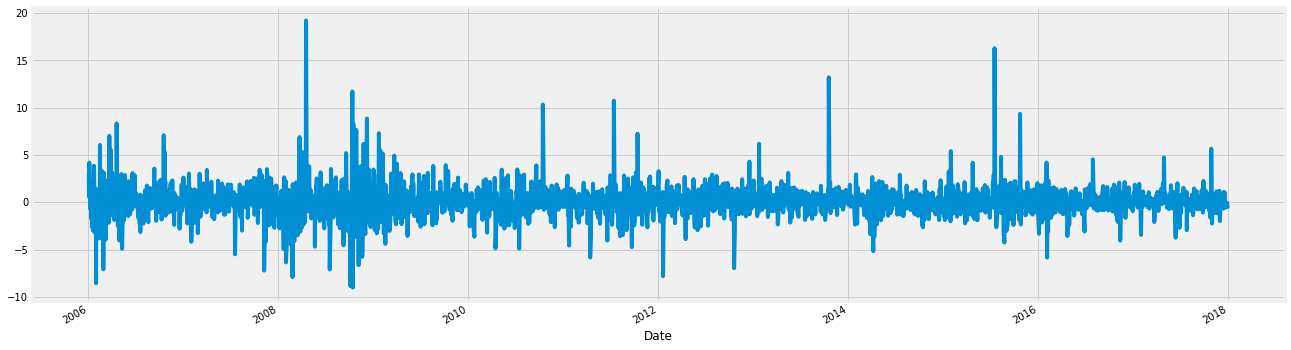

In [6]:
stockData.High.pct_change().mul(100).plot(figsize=(20,6))

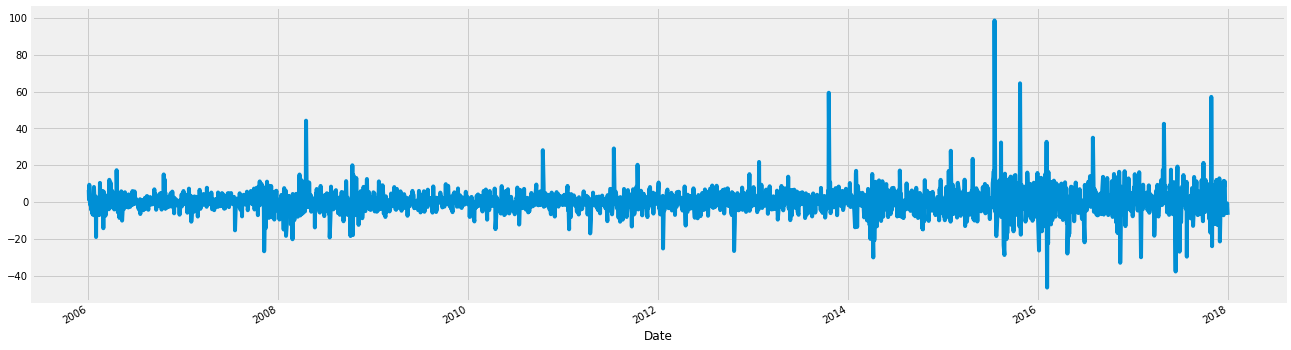

In [7]:
stockData.High.diff().plot(figsize=(20,6))

In [8]:
stockData1 = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

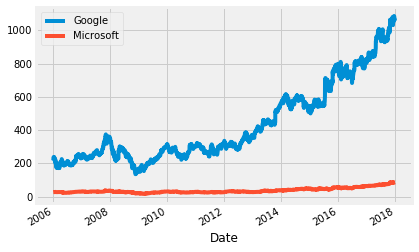

In [9]:
stockData.High.plot()
stockData1.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

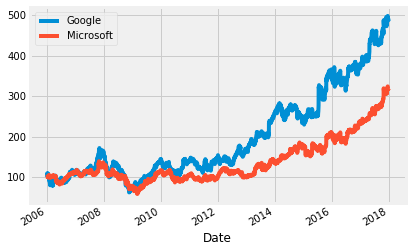

In [10]:
normalized_stockData = stockData.High.div(stockData.High.iloc[0]).mul(100)
normalized_stockData1 = stockData1.High.div(stockData1.High.iloc[0]).mul(100)
normalized_stockData.plot()
normalized_stockData1.plot()
plt.legend(['Google','Microsoft'])
plt.show()

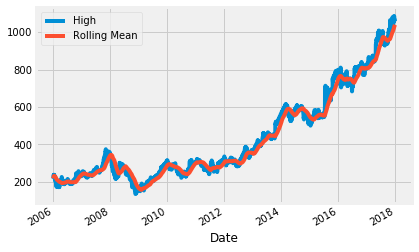

In [11]:
rolling_stockData = stockData.High.rolling('90D').mean()
stockData.High.plot()
rolling_stockData.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

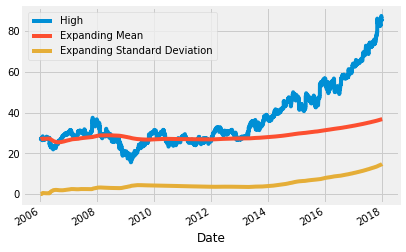

In [12]:
stockData1_mean = stockData1.High.expanding().mean()
stockData1_std = stockData1.High.expanding().std()
stockData1.High.plot()
stockData1_mean.plot()
stockData1_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

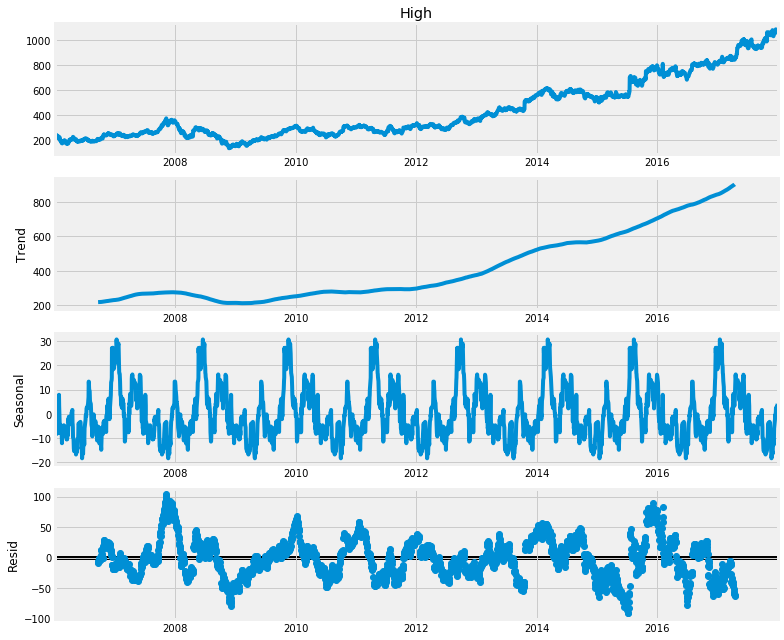

In [13]:
rcParams['figure.figsize'] = 11, 9
decomposed_stockData_volume = sm.tsa.seasonal_decompose(stockData["High"],period=360) 
figure = decomposed_stockData_volume.plot()
plt.show()

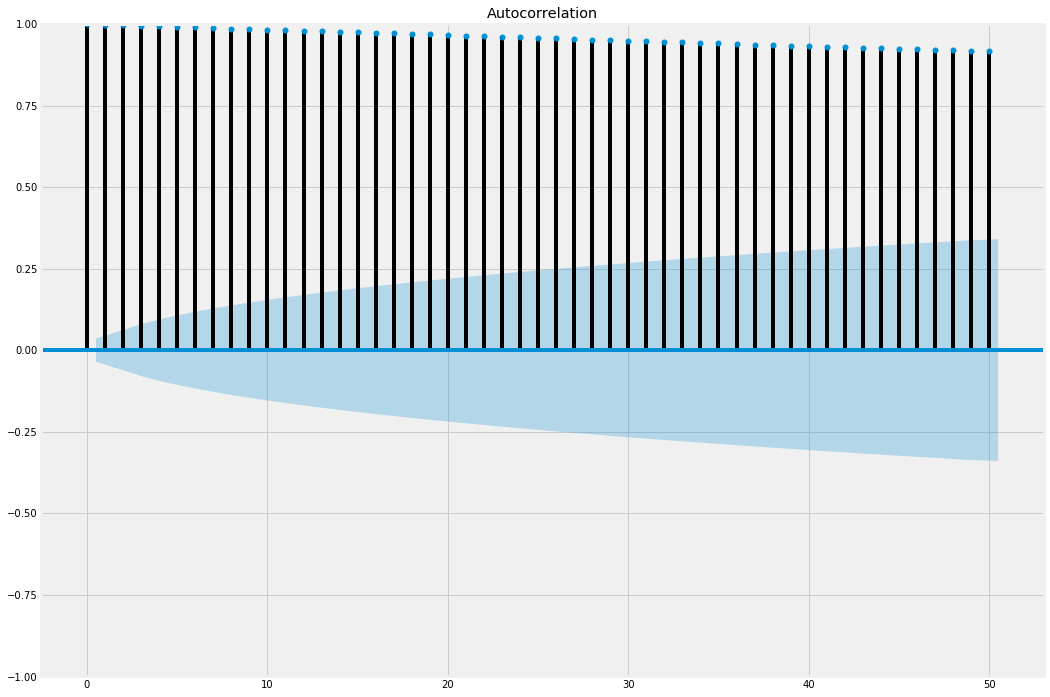

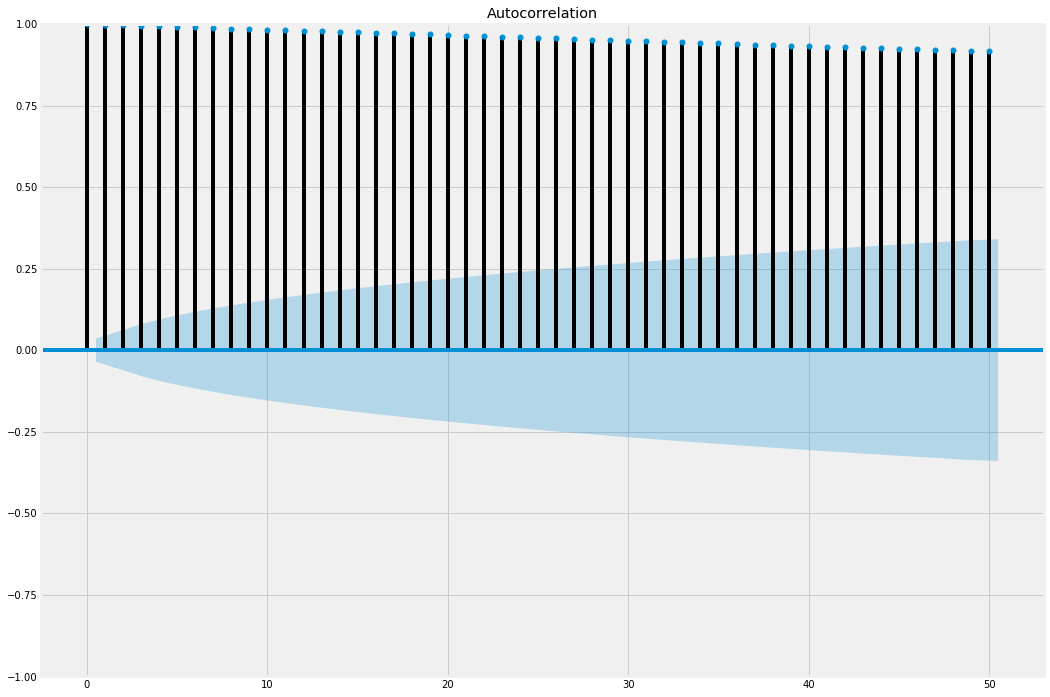

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
# stockData = stockData.drop('Name',axis=1)
plot_acf(stockData['Close'],lags=50)

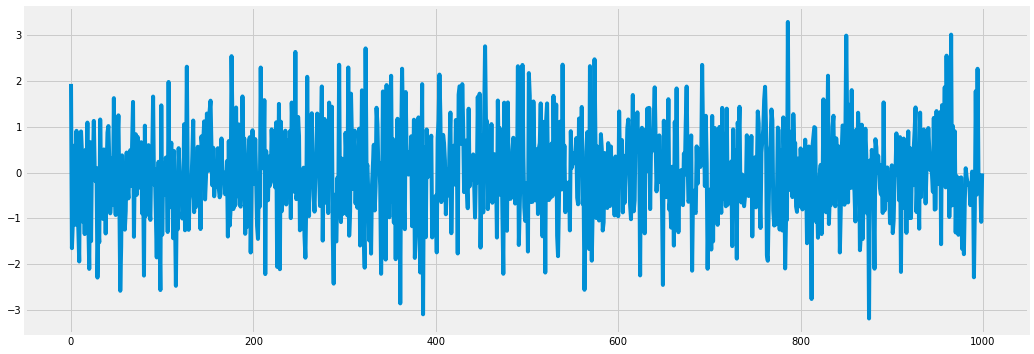

In [14]:
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)

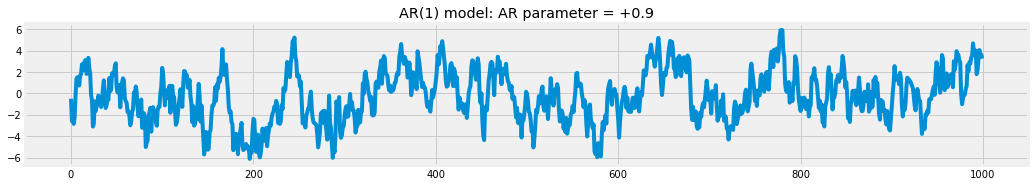

In [15]:
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) 
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

In [16]:
model = ARIMA(sim1, order=(1,0,1))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1426.695
Date:                Thu, 28 Apr 2022   AIC                           2861.389
Time:                        06:35:35   BIC                           2881.020
Sample:                             0   HQIC                          2868.850
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2336      0.317     -0.736      0.462      -0.856       0.388
ar.L1          0.8953      0.016     55.989      0.000       0.864       0.927
ma.L1          0.0385      0.036      1.068      0.2

In [17]:
result.predict(start=0,end=1000)

array([-0.23364472, -0.4801499 , -2.43551854, ...,  3.02760393,
        3.24381152,  2.88289532])

In [18]:
rmse = math.sqrt(mean_squared_error(sim1[0:1000], result.predict(start=0,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0069695369947649.


## Conclusion
- In the experiment Google and Microsoft's stock prices from 2006 to 2018 was used in models
- Various features like change,return,high price value for google data were plot
- It showed that price values started to rise from 2012
- Daily percent change is plotted to understand the volatility of the prices.It was found that on average it had avolatility of 5 %.
- Seasonal decompose was usd to find trend, seasonality and residual errors in time series data
    For MSFT we found a increasing trend, seasonal repetion of around 8 months and residual error of around 50 points

- Stock price prediction can be further improved by bringing in extensive feature engineering like technical analysis values such as indicators and chart patterns, we can nlp to scan various news to find if a stock is favourable in the near future
- ARIMA model of order 1,0,1 was used to train and predict the time series data and the root mean squared error is 1.02.
- If possible having periodic fundamental data for the comay can also be added as a factor to improve performance.
- I was able to understand trends in time series. I was able to apply ARMA model on the time series data.